# Librerias

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Cargamos los datos con el primer potenciometro

In [3]:
ruta = 'Mediciones potencia'
files = os.listdir(ruta)

W_files, I_files = [], []
for file in files[3:]: #--> El primer archivo corresponde a la segunda medicion
    # Guardado de la corriente
    amp = float(file[4:-5])
    I_files.append(amp) #A

    # Cargamos los archivos
    df = pd.read_csv(ruta + f'/{file}', sep=" ", header=None)
    wats = df[2][2:] #--> todos los valores

    # Guardamos los valores
    wats_str = np.array([ float(wat[1] + '.' + wat[3:-5]) for wat in wats]) #--> No tengo en cuenta la potencia
    pot_wat = np.array([ float(wat[-3]) for wat in wats])

    W_files.append(wats_str * 10**(-pot_wat)) #W


ValueError: could not convert string to float: 's_potencia_1064_luz_apagada_sin-lasea'

## Sacamos valores medios y std

In [ ]:
I, err_I, W, err_W = [], [], [], []
for i, w in zip(I_files, W_files):
    I.append(np.mean(i)), err_I.append(np.std(i))
    W.append(np.mean(w)), err_W.append(np.std(w))

# Mediciones de potencia sin la cavidad

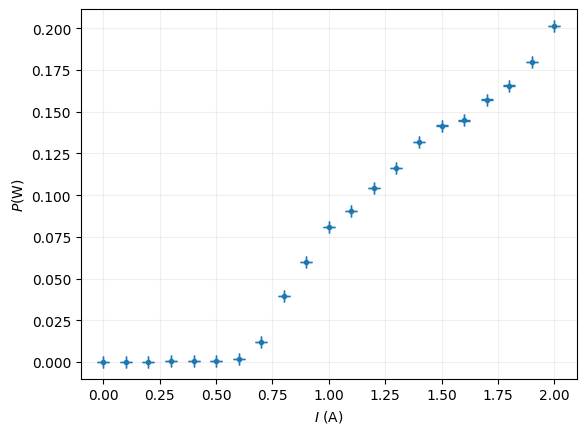

In [ ]:
plt.figure()
plt.errorbar(I, W, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)

plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')

plt.grid(alpha = 0.2)
plt.show()

In [ ]:
pot = [0, 0, 0.1e-3, 0.1e-3, 0.2e-3, 0.5e-3, 0.9e-3, 6e-3, 18e-3, 27.0e-3, 31.3e-3, 37.0e-3, 42.9e-3, 44.8e-3, 53.7e-3, 64.3e-3, 74.6e-3, 83.7e-3, 94.6e-3, 105.6e-3, 117.2e-3, 128.6e-3, 141.6e-3, 153.7e-3] #W
a = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3] #A
len(a), len(pot)
pd.DataFrame({'I (A)': a, 'P (W)': pot}).to_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_sin-lasear.csv', index=False)

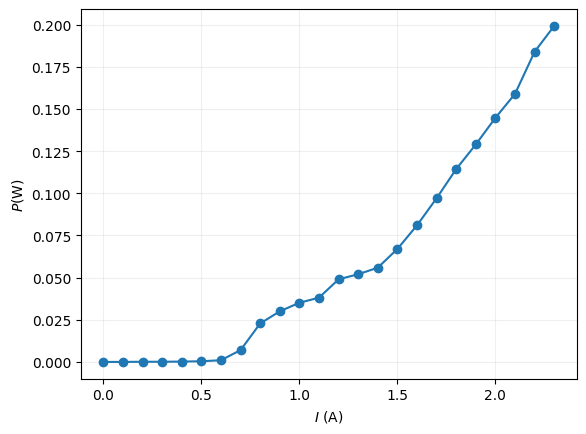

In [ ]:
plt.figure(0, )
#plt.errorbar(a, pot, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)
plt.plot(a, pot, 'o-')
plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')

plt.grid(alpha = 0.2)
plt.show()

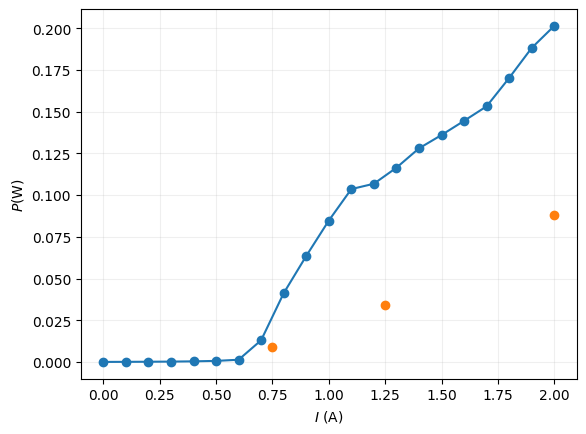

In [ ]:
df = pd.read_csv('Mediciones potencia/medicion_completa_slim.csv')
I2, P2 = df['Corriente[A]'], df['Potencia[W]']

df2 = pd.read_csv('Mediciones potencia/Datos_potencia_810.csv')
Ib, Pb = df2['I (A)'], df2['P (W)']

plt.plot(I2, P2, 'o-')
plt.plot(Ib, Pb, 'o')
plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')
plt.grid(alpha = 0.2)
plt.show()

# Mediciones espejo plano con luz apagada

In [4]:
pot_luz_apagada = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada.csv')
pot_luz_apagada_sin_lasear = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_sin-lasear.csv')
pot_luz_apagada_rendija = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_rendija.csv')

df = pd.DataFrame({'I(A)':pot_luz_apagada['I (A)'],
                   'Potencia (W)':pot_luz_apagada['P (W)'],
                   'Pototencia sin lasear (W)':pot_luz_apagada_sin_lasear['P (W)'],
                   'Potencia con rendija (W)':pot_luz_apagada_rendija['P (W)']})

df['Potencia sin ruido (W)'] = df['Potencia (W)'] - df['Pototencia sin lasear (W)']
display(df.head(11))

,I(A),Potencia (W),Pototencia sin lasear (W),Potencia con rendija (W),Potencia sin ruido (W)
0,0.0,0.0000,0.0000,0.0000,0.0000
1,0.1,0.0000,0.0000,0.0000,0.0000
2,0.2,0.0001,0.0001,0.0000,0.0000
3,0.3,0.0001,0.0001,0.0000,0.0000
4,0.4,0.0002,0.0002,0.0000,0.0000
5,0.5,0.0004,0.0005,0.0001,-0.0001
6,0.6,0.0010,0.0009,0.0002,0.0001
7,0.7,0.0070,0.0060,0.0010,0.0010
8,0.8,0.0228,0.0180,0.0038,0.0048
9,0.9,0.0300,0.0270,0.0047,0.0030


Parametro de 0 W:
m = 0.0013928571428571425
b = -0.0001607142857142857
---------------
Parametro de la lineal:
m = 0.1610484848484847
b = -0.17478969696969662
---------------
Punto de encuentro:
Potencia = 0.0016842009887933248
Corriente = 1.0937853252875156


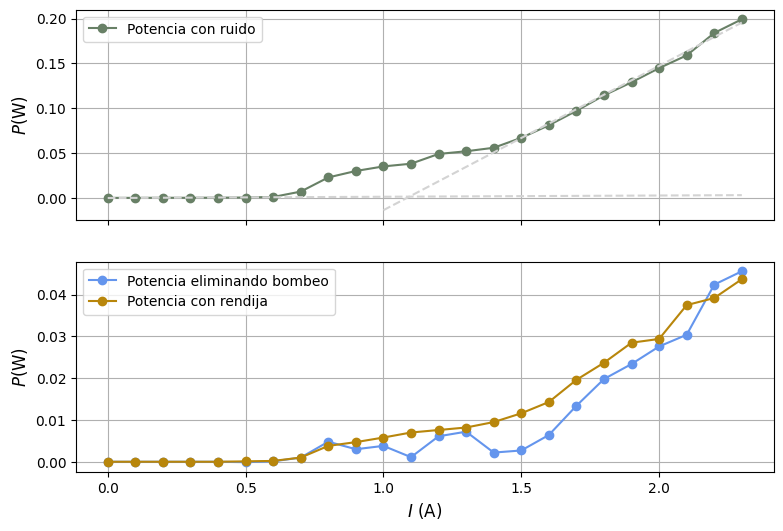

In [24]:
# ---Ajuste---
param1, pcov1 = np.polyfit(df['I(A)'][0:7],df['Potencia (W)'][0:7],1,cov = True)
mod1 = np.polyval(param1,df['I(A)'][0:7]) 
residuos = df['Potencia (W)'][0:7] - mod1

param2, pcov2 = np.polyfit(df['I(A)'][-10:],df['Potencia (W)'][-10:],1,cov = True)
mod2 = np.polyval(param2,df['I(A)'][-10:]) 
residuos = df['Potencia (W)'][-10:] - mod2

# ---Encuentro---
I = (param2[1]-param1[1])/(param1[0]-param2[0])
P = param1[0]*I-param1[1] 

# ---Grafico---
fig,axs = plt.subplots(2,1,sharex=True,figsize=(9,6))

axs[0].plot(df['I(A)'], df['Potencia (W)'], 'o-', label='Potencia con ruido',color = '#688066')
axs[0].plot(df['I(A)'],df['I(A)']*param1[0] + param1[1],'--', color = 'lightgrey')
axs[0].plot(df['I(A)'][-14:],df['I(A)'][-14:]*param2[0] + param2[1],'--',color = 'lightgrey')
#axs[0].scatter(I,P,color = 'rosybrown')
axs[0].set_ylabel(r'$P$(W)',fontsize=12)
axs[0].grid()
axs[0].legend()

axs[1].plot(df['I(A)'], df['Potencia sin ruido (W)'], 'o-', label='Potencia eliminando bombeo',color = 'cornflowerblue')
axs[1].plot(df['I(A)'], df['Potencia con rendija (W)'], 'o-', label='Potencia con rendija',color = 'darkgoldenrod')
axs[1].set_xlabel(r'$I$ (A)',fontsize=12)
axs[1].set_ylabel(r'$P$(W)',fontsize=12)
axs[1].grid()
axs[1].legend()

# ---Parametros del ajuste---
print('Parametro de 0 W:')
print(f'm = {param1[0]}')
print(f'b = {param1[1]}')
print('---------------')
print('Parametro de la lineal:')
print(f'm = {param2[0]}')
print(f'b = {param2[1]}')
print('---------------')
print('Punto de encuentro:')
print(f'Potencia = {P}')
print(f'Corriente = {I}')

fig.savefig('Figuras Informe/Analisis_potencia_cavidad_lineal.pdf', format = 'pdf')